In [0]:
import keras
from keras import models
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [12]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [0]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [14]:
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
model = Sequential()
model.add(Conv2D(128,kernel_size = 3, activation = 'relu', input_shape=(28,28,1)))
model.add(MaxPool2D())
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(10,activation='softmax'))


In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        73792     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 32)          18464     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32)               

In [17]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 23s 387us/step - loss: 0.4913 - acc: 0.9100 - val_loss: 0.1030 - val_acc: 0.9702
Epoch 2/3
60000/60000 [==============================] - 23s 380us/step - loss: 0.1031 - acc: 0.9689 - val_loss: 0.0885 - val_acc: 0.9740
Epoch 3/3
60000/60000 [==============================] - 23s 379us/step - loss: 0.0811 - acc: 0.9755 - val_loss: 0.0720 - val_acc: 0.9791


In [0]:
# load and show an image with Pillow
from PIL import Image
# load the image
image = Image.open('12.jpg')
image = image.convert('1')
img_resized = image.resize((28,28))

In [0]:


img_resized = np.array(img_resized).reshape(28,28)

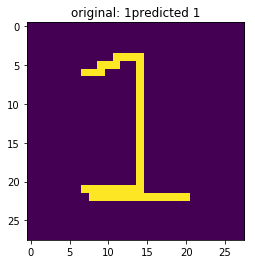

In [20]:
plt.title('original: 1'+'predicted '+str(np.argmax(model.predict(img_resized.reshape(-1,28,28,1)))))
a = plt.imshow(img_resized)